# 課題4

In [1]:
import numpy as np
import model
import function as F
import optimizer
import os

In [2]:
train_data, valid_data=F.train_data_loader()
test_data=F.test_data_loader()

In [3]:
os.getcwd()

''

In [4]:
INF=1e7
#ハイパーパラメーター
batch_size=10
D=8
epoch_num=100

#lossとかaccuracyとかの記録
stat_dict={"train_acc":[], "val_acc":[], "epoch_loss":[], "loss_list":[]}
best_acc=0

#modelとoptimizerの設定
gnn=model.GNN(D)
optimizer=optimizer.Adam(h=1e-7)

#学習
for i in range(epoch_num):
    train_range=np.arange(len(train_data))
    epoch_loss=[]
    while(True): #epoch開始
        if np.all(train_range==INF): #epoch終了条件
            train_acc=F.get_accuracy(train_data, gnn)
            val_acc=F.get_accuracy(valid_data, gnn)
            stat_dict["train_acc"].append(train_acc)
            stat_dict["val_acc"].append(val_acc)
            stat_dict["epoch_loss"].append(sum(epoch_loss)/len(epoch_loss))
            if val_acc>best_acc:
                best_acc=val_acc
                gnn.save(model_name="best_model_Adam")
            print("-"*10)
            print("train accuracy:", train_acc)
            print("val accuracy:", val_acc)
            print("epoch loss average:", sum(epoch_loss)/len(epoch_loss))
            print(i, "epoch finish!")
            break
        
        #indexをINTでないtrain_range内の要素からbatch size分選択し、選択したindexはINFにする。全ての要素がINFになったらepoch終了
        indexs=list(np.random.choice(train_range[train_range!=INF], batch_size, replace=False))
        train_range[indexs]=INF
        
        #1batch分の学習
        tmp_loss=0
        for idx in indexs:
            D, adj, y=train_data[idx]
 
            grads=gnn.numerical_gradient(adj, y)
            params=gnn.theta
            optimizer.update(params, grads)
        
            tmp_loss+=gnn.loss(adj, y)
        epoch_loss.append(tmp_loss/batch_size)
        stat_dict["loss_list"].append(tmp_loss/batch_size)
        
print()
print("#"*10)
print("best accuracy:", best_acc)
print("#"*10)

----------
train accuracy: 0.50875
val accuracy: 0.51
epoch loss average: [2.80492554]
0 epoch finish!
----------
train accuracy: 0.52
val accuracy: 0.5075
epoch loss average: [2.15773689]
1 epoch finish!
----------
train accuracy: 0.529375
val accuracy: 0.53
epoch loss average: [1.70902876]
2 epoch finish!
----------
train accuracy: 0.534375
val accuracy: 0.55
epoch loss average: [1.3875487]
3 epoch finish!
----------
train accuracy: 0.536875
val accuracy: 0.5575
epoch loss average: [1.16922318]
4 epoch finish!
----------
train accuracy: 0.551875
val accuracy: 0.565
epoch loss average: [1.024453]
5 epoch finish!
----------
train accuracy: 0.554375
val accuracy: 0.56
epoch loss average: [0.92764044]
6 epoch finish!
----------
train accuracy: 0.56
val accuracy: 0.5575
epoch loss average: [0.86173893]
7 epoch finish!
----------
train accuracy: 0.57125
val accuracy: 0.56
epoch loss average: [0.81550036]
8 epoch finish!
----------
train accuracy: 0.573125
val accuracy: 0.56
epoch loss aver

In [13]:
gnn.load(model_name="best_model_Adam")

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
for k,v in stat_dict.items():
    print(k)
    v=np.array(v)

train_acc
loss_list
val_acc
epoch_loss


In [16]:
np.savez_compressed("Adam_stat_1e_7.npz", 
                   epoch_loss=stat_dict["epoch_loss"], 
                   loss_list=stat_dict["loss_list"], 
                  val_acc=stat_dict["val_acc"],
                  train_acc=stat_dict["train_acc"])

Text(0.5, 0.92, 'optimizer: Adam')

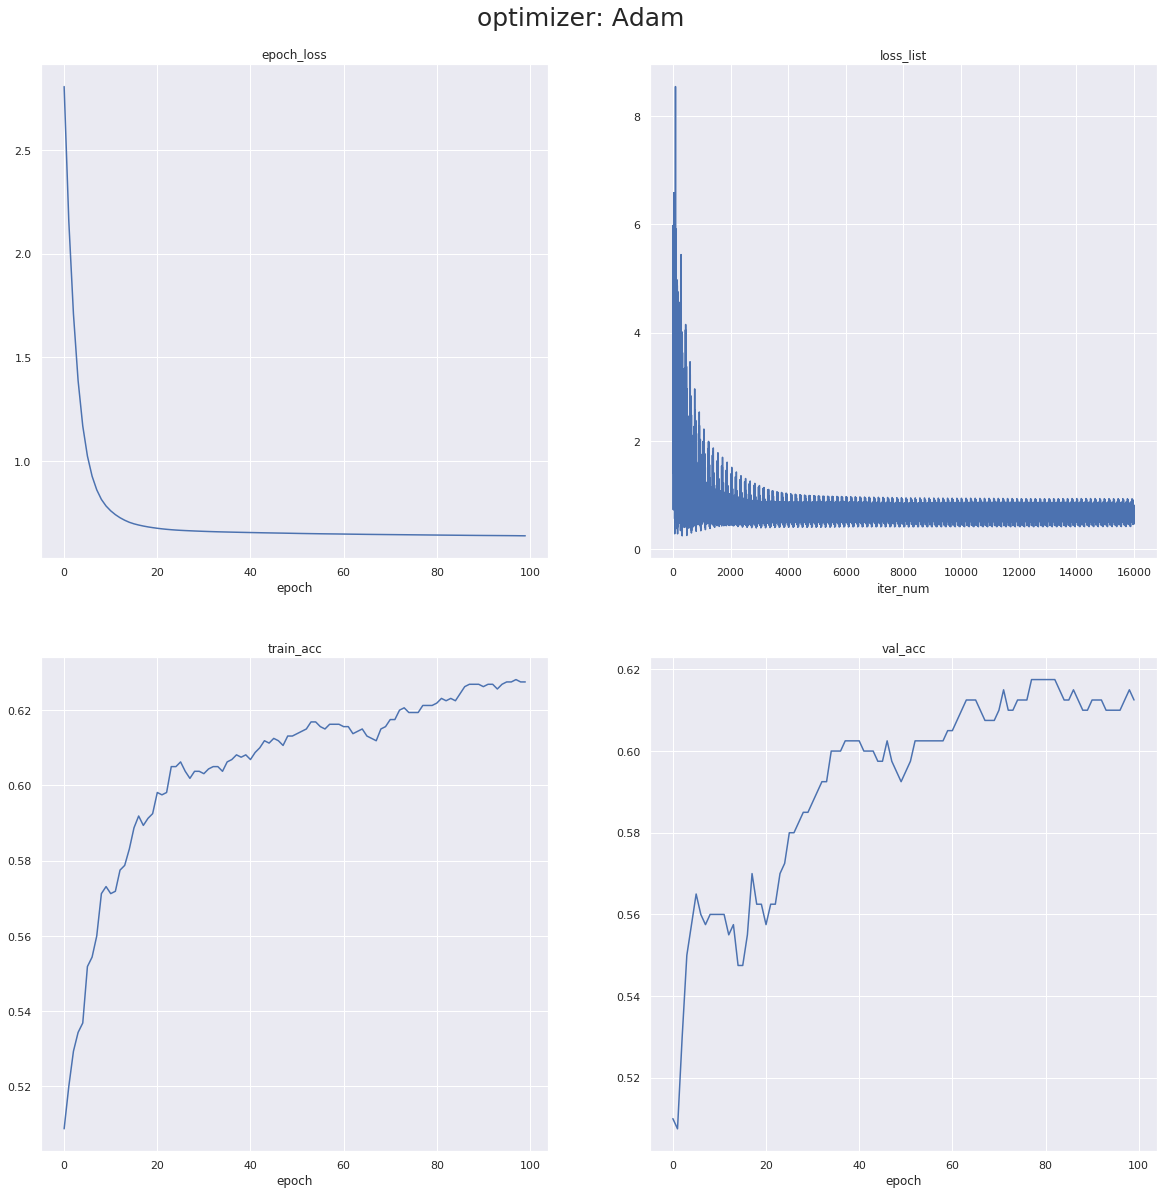

In [17]:
sns.set()
fig=plt.figure(figsize=(20,20))

for i, (k,v) in enumerate(sorted(stat_dict.items())):
    ax=fig.add_subplot(2,2,i+1)
    ax.plot(np.arange(len(v)), v)
    ax.set_title(k)
    if k!="loss_list":
        ax.set_xlabel("epoch")
    else:
        ax.set_xlabel("iter_num")
fig.suptitle("optimizer: Adam", fontsize=25, x=0.5, y=0.92)   

In [18]:
test_data=F.test_data_loader()

In [19]:
label_dict={}
for data in test_data:
    D, adj, file_name=data
    y=gnn.get_label(adj)
    num=int(file_name.split("_")[0])
    label_dict[num]=y

In [20]:
with open("prediction.txt", "w") as f:
    for i, (k,v) in enumerate(label_dict.items()):
        if i==k:
            v=str(v)+"\n"
            f.write(v)

In [21]:
label_dict

{0: 1,
 1: 1,
 2: 1,
 3: 0,
 4: 1,
 5: 1,
 6: 1,
 7: 1,
 8: 0,
 9: 1,
 10: 0,
 11: 1,
 12: 0,
 13: 0,
 14: 1,
 15: 0,
 16: 1,
 17: 0,
 18: 0,
 19: 0,
 20: 0,
 21: 1,
 22: 0,
 23: 1,
 24: 0,
 25: 1,
 26: 1,
 27: 1,
 28: 0,
 29: 1,
 30: 0,
 31: 0,
 32: 1,
 33: 0,
 34: 0,
 35: 0,
 36: 0,
 37: 1,
 38: 0,
 39: 1,
 40: 0,
 41: 1,
 42: 0,
 43: 1,
 44: 0,
 45: 0,
 46: 1,
 47: 0,
 48: 1,
 49: 0,
 50: 1,
 51: 0,
 52: 0,
 53: 0,
 54: 0,
 55: 0,
 56: 0,
 57: 1,
 58: 1,
 59: 0,
 60: 1,
 61: 0,
 62: 1,
 63: 0,
 64: 0,
 65: 0,
 66: 0,
 67: 0,
 68: 1,
 69: 1,
 70: 1,
 71: 1,
 72: 1,
 73: 0,
 74: 1,
 75: 1,
 76: 0,
 77: 1,
 78: 0,
 79: 0,
 80: 0,
 81: 1,
 82: 0,
 83: 1,
 84: 1,
 85: 0,
 86: 0,
 87: 1,
 88: 0,
 89: 0,
 90: 0,
 91: 0,
 92: 1,
 93: 0,
 94: 0,
 95: 1,
 96: 0,
 97: 1,
 98: 0,
 99: 0,
 100: 1,
 101: 0,
 102: 1,
 103: 0,
 104: 0,
 105: 0,
 106: 1,
 107: 0,
 108: 0,
 109: 1,
 110: 1,
 111: 0,
 112: 1,
 113: 1,
 114: 1,
 115: 0,
 116: 0,
 117: 1,
 118: 0,
 119: 1,
 120: 1,
 121: 0,
 122: 0,
 12